Load the Dataset

Categories: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Counter({'C': 1447, 'O': 1429, 'I': 1379, 'V': 1290, '1': 1200, '2': 1200, '3': 1200, '4': 1200, '5': 1200, '6': 1200, '7': 1200, '8': 1200, '9': 1200, 'A': 1200, 'B': 1200, 'D': 1200, 'E': 1200, 'F': 1200, 'G': 1200, 'H': 1200, 'J': 1200, 'K': 1200, 'L': 1200, 'M': 1200, 'N': 1200, 'P': 1200, 'Q': 1200, 'R': 1200, 'S': 1200, 'T': 1200, 'U': 1200, 'W': 1200, 'X': 1200, 'Y': 1200, 'Z': 1200})
Sample images in 1: 1006.jpg


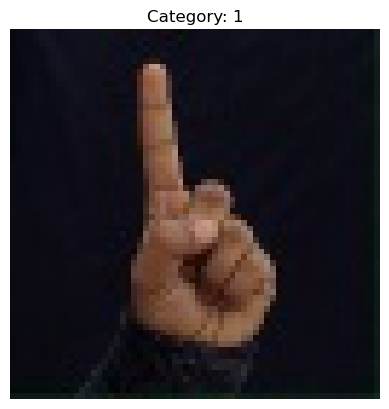

In [48]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter

# Path to dataset
data_dir = "Resized_Indian"

# Example: Listing files in the dataset
categories = os.listdir(data_dir)
print("Categories:", categories)
print(Counter(labels))

# View sample images from a category
sample_images = os.listdir(os.path.join(data_dir, categories[0]))
print(f"Sample images in {categories[0]}:", sample_images[10])

# Display a sample image
sample_image_path = os.path.join(data_dir, categories[0], sample_images[0])
img = Image.open(sample_image_path)
plt.imshow(img)
plt.title(f"Category: {categories[0]}")
plt.axis('off')
plt.show()


 Data Distribution

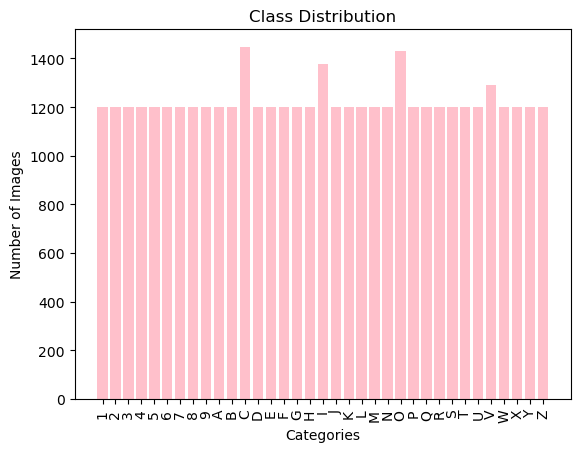

In [46]:
from collections import Counter

# Count images per class
class_counts = {}
for category in categories:
    class_counts[category] = len(os.listdir(os.path.join(data_dir, category)))
color = 'pink'
# Plot class distribution
plt.bar(class_counts.keys(), class_counts.values(),color=color)
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


 Image Properties

In [9]:
image_shapes = []
for category in categories:
    image_files = os.listdir(os.path.join(data_dir, category))
    for image_file in image_files[:10]:  # Sample 10 images per category
        img_path = os.path.join(data_dir, category, image_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# Analyze image shapes
print("Unique image shapes:", set(image_shapes))


Unique image shapes: {(64, 64)}


Data Quality Checks

In [13]:
for category in categories:
    image_files = os.listdir(os.path.join(data_dir, category))
    for image_file in image_files:
        try:
            img_path = os.path.join(data_dir, category, image_file)
            img = Image.open(img_path)
            img.verify()  # Verify image integrity
        except (IOError, SyntaxError) as e:
            print(f"Corrupted image: {img_path}")


Visualize Sample Images

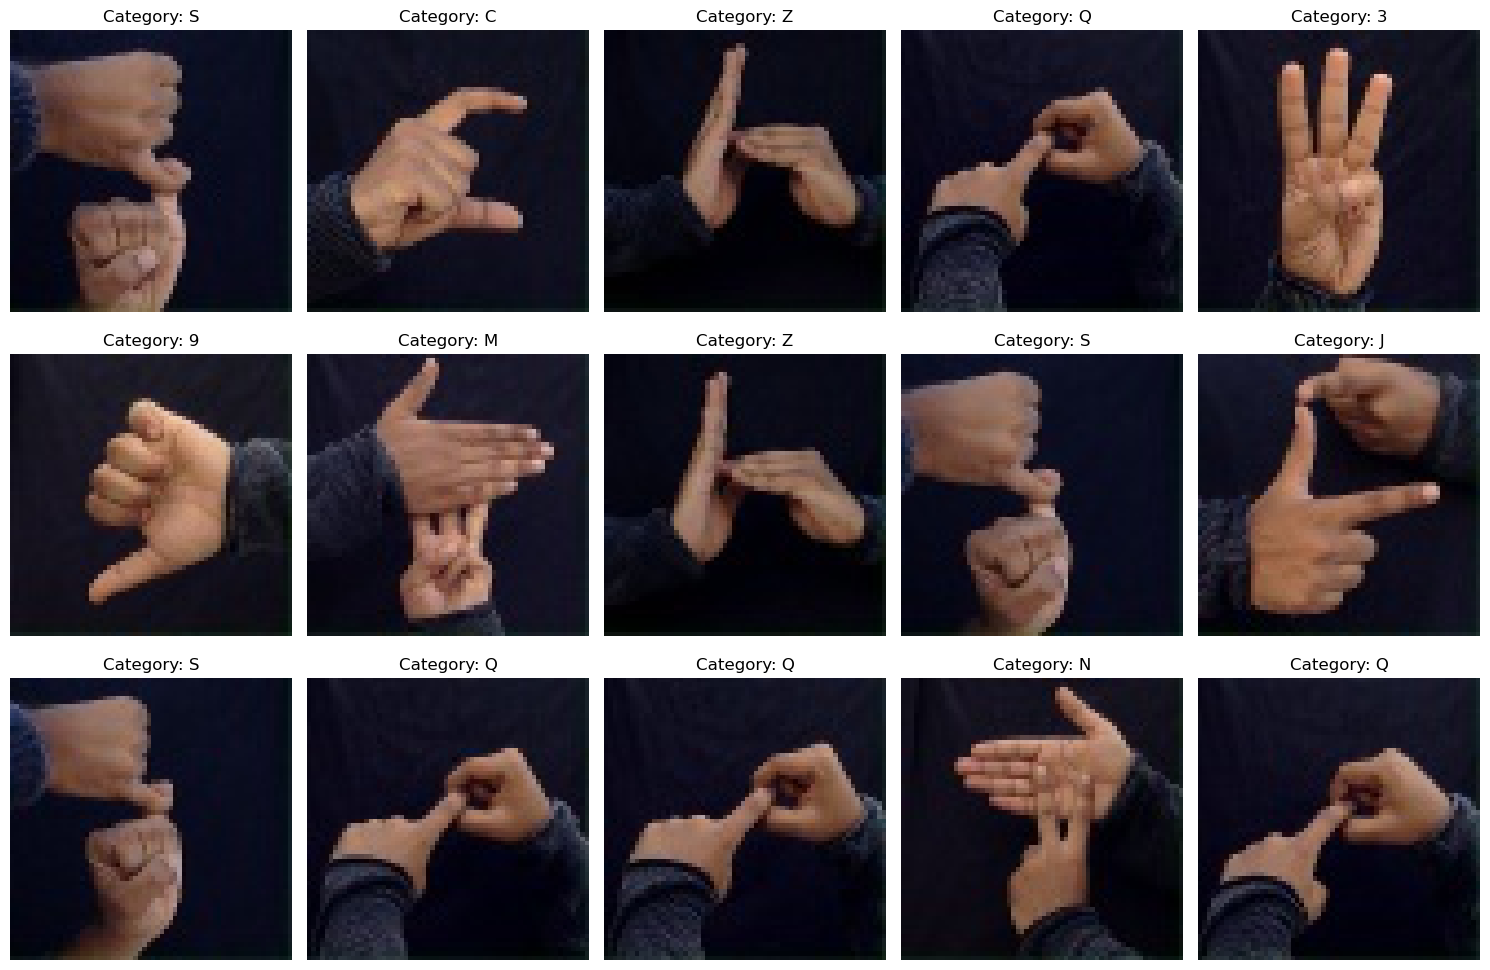

In [19]:
import random

fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for ax in axes:
    category = random.choice(categories)
    img_path = os.path.join(data_dir, category, random.choice(os.listdir(os.path.join(data_dir, category))))
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"Category: {category}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Augmentation Feasibility

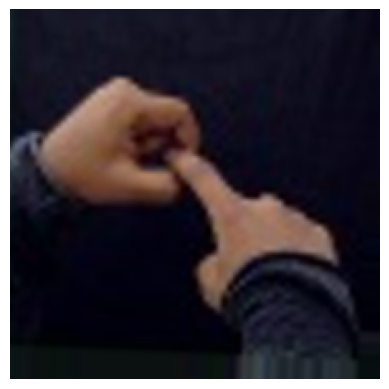

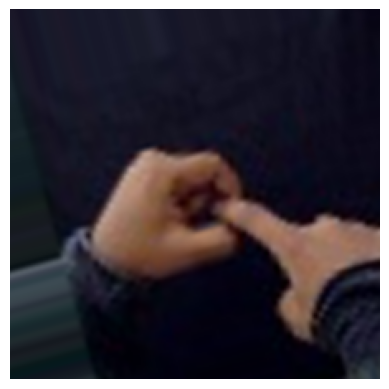

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Apply augmentation to a sample image
img_array = np.array(img.resize((224, 224))) / 255.0  # Resize and normalize
img_array = np.expand_dims(img_array, axis=0)

# Generate augmented images
for _ in range(2):
    aug_img = datagen.flow(img_array, batch_size=1)[0]
    plt.imshow(aug_img[0])
    plt.axis('off')
    plt.show()


Statistical Analysis

In [29]:
pixel_values = []
for category in categories:
    image_files = os.listdir(os.path.join(data_dir, category))
    for image_file in image_files[:50]:  # Sample 50 images per category
        img_path = os.path.join(data_dir, category, image_file)
        img = np.array(Image.open(img_path).resize((224, 224))) / 255.0
        pixel_values.append(img.flatten())

pixel_values = np.concatenate(pixel_values)
print("Pixel Value Statistics:")
print(f"Mean: {np.mean(pixel_values):.4f}, Std: {np.std(pixel_values):.4f}")


Pixel Value Statistics:
Mean: 0.2069, Std: 0.2211


Prepare Dataset for Modeling

In [32]:
from sklearn.model_selection import train_test_split

# Example: Splitting file paths and labels
image_paths = []
labels = []

for category in categories:
    image_files = os.listdir(os.path.join(data_dir, category))
    for image_file in image_files:
        image_paths.append(os.path.join(data_dir, category, image_file))
        labels.append(category)

# Train-validation-test split
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, stratify=labels)
train_paths, val_paths, train_labels, val_labels = train_test_split(train_paths, train_labels, test_size=0.25, stratify=train_labels)

print(f"Training samples: {len(train_paths)}")
print(f"Validation samples: {len(val_paths)}")
print(f"Test samples: {len(test_paths)}")


Training samples: 25647
Validation samples: 8549
Test samples: 8549
